Importing the Dependencies

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and Processing

In [152]:
# loading the data from file to pandas dataframe
dataset=pd.read_csv(r"C:\Users\sydul\Downloads\CAR DETAILS FROM CAR DEKHO.csv")

In [154]:
# inspecting the first 5 rows of the dataframe
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [156]:
# checking the number of rows and columns
dataset.shape

(4340, 8)

In [158]:
# getting some information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [160]:
# checking the number of missing values
dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [162]:
# checking the distribution of categorical data
print(dataset.fuel.value_counts())
print(dataset.seller_type.value_counts())
print(dataset.transmission.value_counts())
print(dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


encoding the Categorical Data

In [165]:
# encoding fuel column
dataset.replace({"fuel":{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

# encoding seller_type column
dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)

# encoding transmission column
dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

# encoding owner column
dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

C:\Users\sydul\AppData\Local\Temp\ipykernel_14020\779749067.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({"fuel":{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
C:\Users\sydul\AppData\Local\Temp\ipykernel_14020\779749067.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)
C:\Users\sydul\AppData\Local\Temp\ipykernel_14020\779749067.py:8: FutureWarning: Downcasting behavior in `replace` is depreca

In [167]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


In [169]:
x=dataset.drop(['name','selling_price'],axis=1)
y=dataset['selling_price']

In [171]:
print(x)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            1             0      0
1     2007      50000     0            1             0      0
2     2012     100000     1            1             0      0
3     2017      46000     0            1             0      0
4     2014     141000     1            1             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             0      1
4336  2014      80000     1            1             0      1
4337  2009      83000     0            1             0      1
4338  2016      90000     1            1             0      0
4339  2016      40000     0            1             0      0

[4340 rows x 6 columns]


In [173]:
print(y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Splitting Training and Test data

In [176]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)

Model Training

1. Linear RTegression

In [180]:
# loading the liner regression model
lin_reg_model = LinearRegression()

In [182]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [185]:
# prediction on training data 
training_data_prediction=lin_reg_model.predict(x_train)

In [187]:
# R square error 
error_score = metrics.r2_score(y_train,training_data_prediction)
print('R square error:',error_score)

R square error: 0.4276361285018677


visualize the actual prices and predicted prices

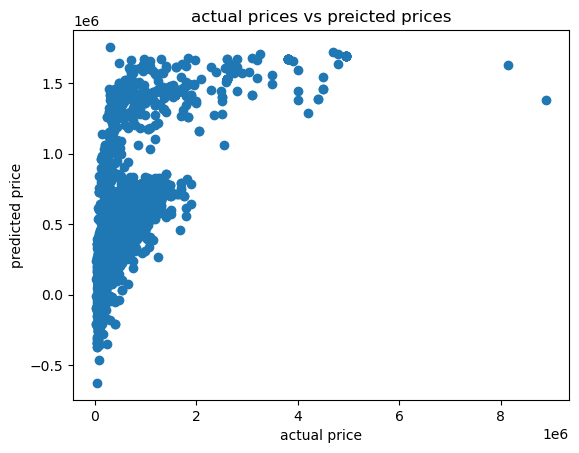

In [190]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual prices vs preicted prices')
plt.show()

In [192]:
# prediction on training data
test_data_prediction = lin_reg_model.predict(x_test)


In [194]:
# R squared error
error_score = metrics.r2_score(y_test,test_data_prediction)
print('R squared error:',error_score)

R squared error: 0.5027999353753417


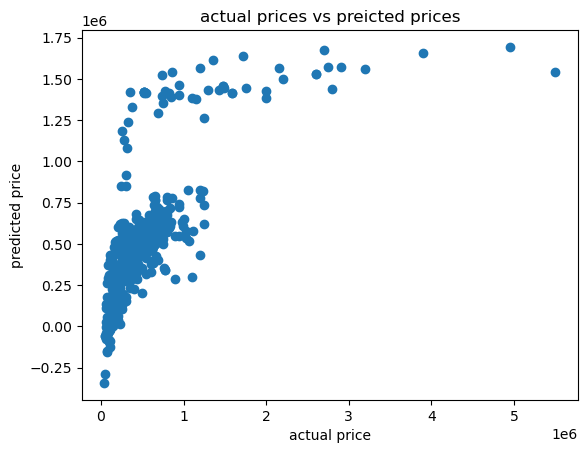

In [196]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual prices vs preicted prices')
plt.show()

2.Lasso Regression

In [201]:
# loading the Lasso regression model
lass_reg_model = Lasso()

In [203]:
lass_reg_model.fit(x_train,y_train)

Lasso()

Model Evaluation

In [206]:
# prediction on training data 
training_data_prediction=lass_reg_model.predict(x_train)

In [208]:
# R square error 
error_score = metrics.r2_score(y_train,training_data_prediction)
print('R square error:',error_score)

R square error: 0.42763612844686616


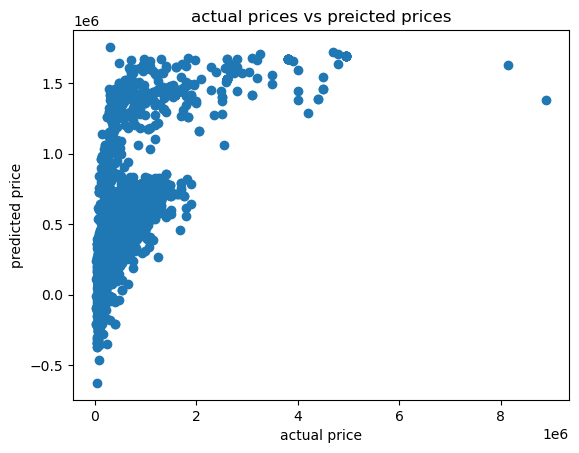

In [210]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual prices vs preicted prices')
plt.show()

In [143]:
# prediction on training data
test_data_prediction = lass_reg_model.predict(x_test)


In [212]:
# R squared error
error_score = metrics.r2_score(y_test,test_data_prediction)
print('R squared error:',error_score)

R squared error: 0.5027999353753417


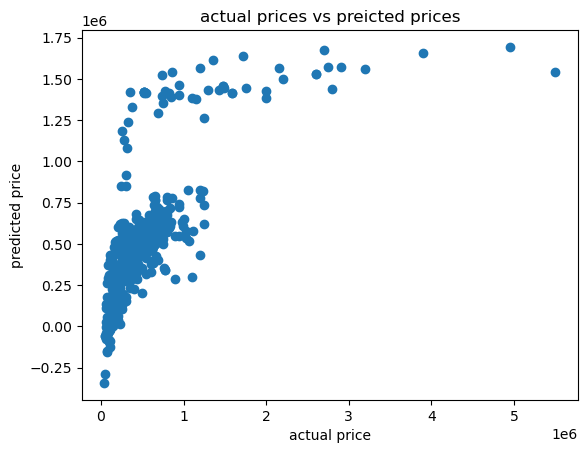

In [214]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual prices vs preicted prices')
plt.show()